In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [11]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [13]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<Axes: ylabel='Density'>

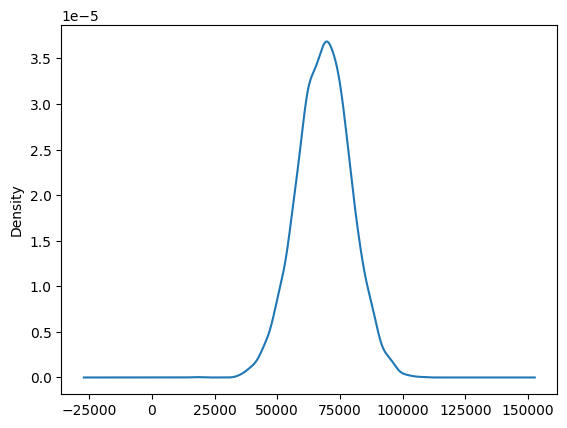

In [16]:
df['Avg. Area Income'].plot.density()

<Axes: ylabel='Density'>

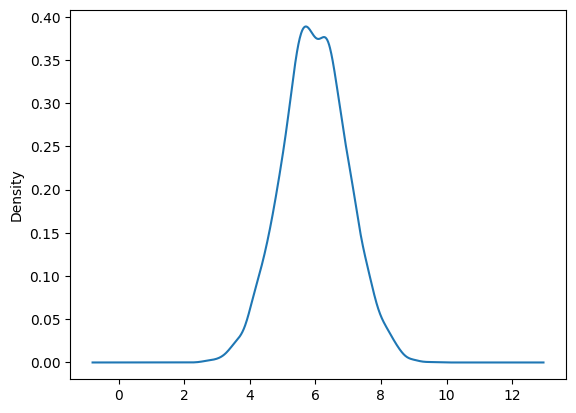

In [17]:
df['Avg. Area House Age'].plot.density()

<Axes: ylabel='Density'>

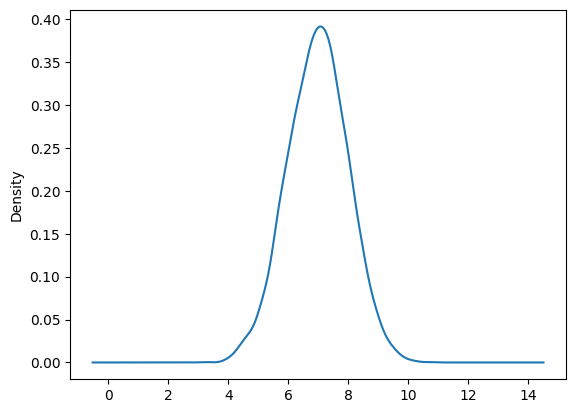

In [18]:
df['Avg. Area Number of Rooms'].plot.density()

In [21]:
X = df.iloc[:, 0:-2]
Y = df.iloc[:, -2]

In [22]:
scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)

rescaledX

array([[0.68682217, 0.44198584, 0.50150158, 0.46444444, 0.3299422 ],
       [0.68352073, 0.48853836, 0.46450137, 0.24222222, 0.57596801],
       [0.48373705, 0.46860901, 0.70135011, 0.69555556, 0.52858204],
       ...,
       [0.50713527, 0.67002636, 0.20853446, 0.02888889, 0.47651494],
       [0.55841872, 0.4203891 , 0.51757886, 0.76444444, 0.61128233],
       [0.53071451, 0.48699729, 0.47267788, 0.46      , 0.66708815]])

In [25]:
rescaledDF = pd.DataFrame(rescaledX, columns=X.columns)
rescaledDF

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.686822,0.441986,0.501502,0.464444,0.329942
1,0.683521,0.488538,0.464501,0.242222,0.575968
2,0.483737,0.468609,0.701350,0.695556,0.528582
3,0.506630,0.660956,0.312430,0.280000,0.491549
4,0.469223,0.348556,0.611851,0.495556,0.376988
...,...,...,...,...,...
4995,0.475738,0.754359,0.385619,0.324444,0.326351
4996,0.675097,0.633450,0.444024,0.448889,0.366362
4997,0.507135,0.670026,0.208534,0.028889,0.476515
4998,0.558419,0.420389,0.517579,0.764444,0.611282


In [26]:
rescaledDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.564890,0.484803,0.498658,0.440296,0.518234
std,0.118547,0.144216,0.133694,0.274253,0.142920
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.485889,0.389536,0.407138,0.253333,0.420903
50%,0.567350,0.483815,0.500666,0.455556,0.518751
75%,0.644977,0.582783,0.588787,0.553333,0.614676
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
standardizer = StandardScaler()
standardizedX = standardizer.fit_transform(X)
standardizedX

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [28]:
standardizedDF = pd.DataFrame(standardizedX, columns=X.columns)
standardizedDF

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387
...,...,...,...,...,...
4995,-0.752109,1.869297,-0.845588,-0.422467,-1.342732
4996,0.929740,1.030822,-0.408686,0.031337,-1.062747
4997,-0.487235,1.284470,-2.170269,-1.500251,-0.291937
4998,-0.054592,-0.446694,0.141541,1.182053,0.651116


In [29]:
standardizedDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-2.167155e-17,4.263256e-18,-4.135359e-16,-2.088996e-16,-3.041123e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-4.765584e+00,-3.361975e+00,-3.730214e+00,-1.605598e+00,-3.626413e+00
25%,-6.664724e-01,-6.606490e-01,-6.846171e-01,-6.817833e-01,-6.810902e-01
50%,2.075434e-02,-6.852312e-03,1.502401e-02,5.564767e-02,3.616311e-03
75%,6.756386e-01,6.794590e-01,6.742146e-01,4.122077e-01,6.748621e-01
max,3.670725e+00,3.572745e+00,3.750297e+00,2.041039e+00,3.371219e+00


<Axes: ylabel='Density'>

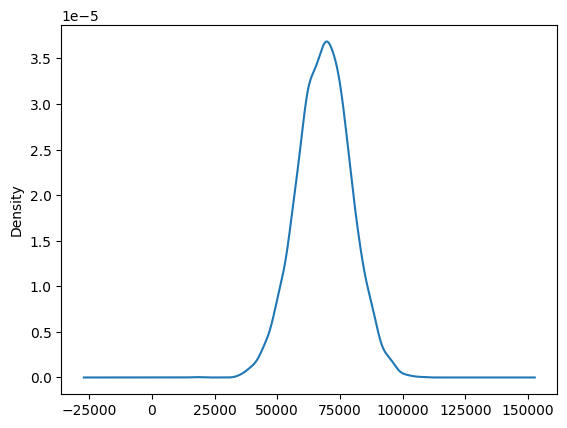

In [30]:
df['Avg. Area Income'].plot.density()

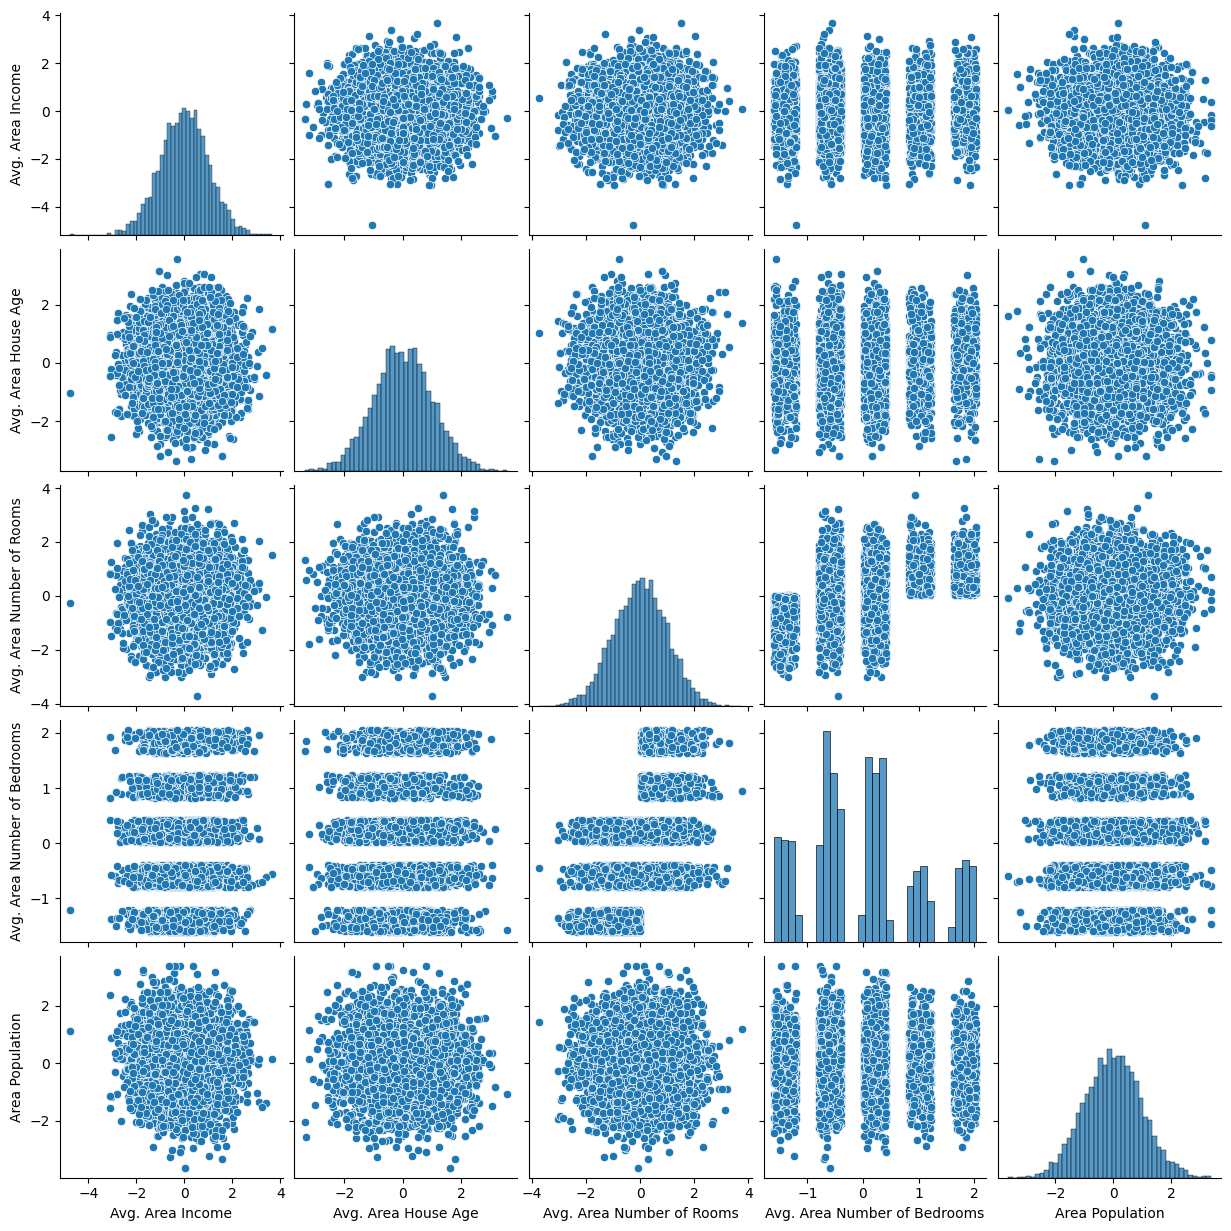

In [32]:
sns.pairplot(standardizedDF)

<Axes: xlabel='Avg. Area Number of Bedrooms', ylabel='Area Population'>

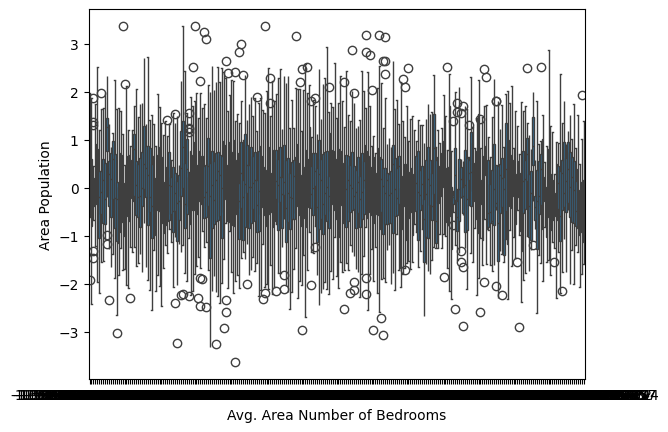

In [38]:
sns.boxplot(x='Avg. Area Number of Bedrooms', y='Area Population', data=standardizedDF)

In [58]:
test_size = 0.3
seed= 100

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= test_size, random_state= seed)

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
xpe = explained_variance_score(y_test, y_predict)

print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')
print(f'Explained_variance_error: {xpe}')

Mean squared error: 10340528517.99612
R2 score: 0.918528414063094
Explained_variance_error: 0.9185284527946759


In [46]:
print(model.coef_)

[2.16018598e+01 1.65667874e+05 1.20204937e+05 5.52723812e+02
 1.52584743e+01]


In [47]:
print(model.intercept_)

-2633630.424045396


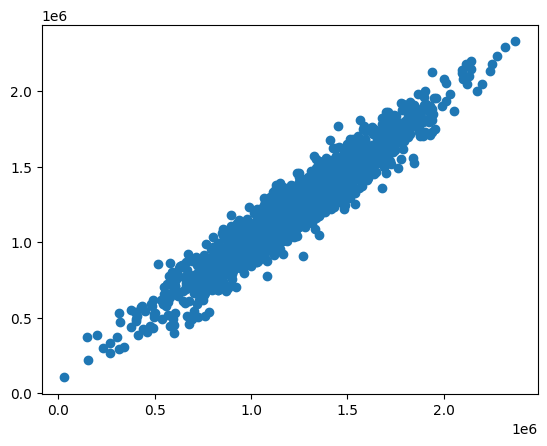

In [52]:
plt.scatter(x=y_test, y=y_predict)

(array([  4.,  30., 123., 294., 390., 334., 212.,  94.,  14.,   5.]),
 array([-336717.48938541, -266865.24561808, -197013.00185076,
        -127160.75808344,  -57308.51431611,   12543.72945121,
          82395.97321854,  152248.21698586,  222100.46075318,
         291952.70452051,  361804.94828783]),
 <BarContainer object of 10 artists>)

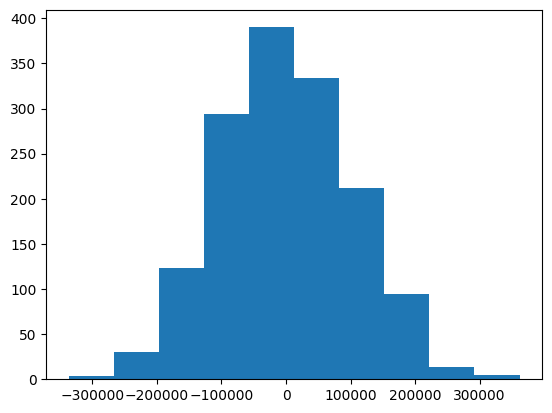

In [54]:
plt.hist(y_test-y_predict)

<Axes: xlabel='Price', ylabel='Count'>

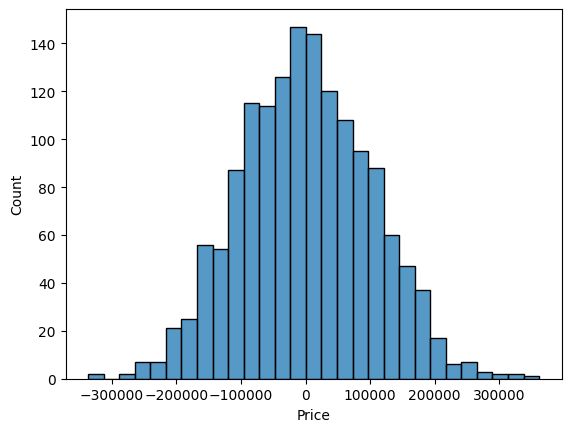

In [55]:
sns.histplot(y_test-y_predict)

<Axes: ylabel='Price'>

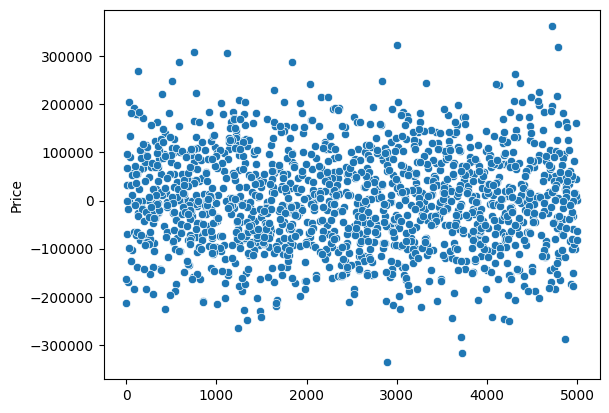

In [59]:
sns.scatterplot(y_test-y_predict)